# Практика

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [53]:
from scipy.stats import fisk
a = 5
fisk_1 = fisk(a) 
sample = fisk_1.rvs(100) 
sample

array([1.33313317, 1.25311504, 1.12785569, 0.72458929, 0.70736184,
       0.56243486, 0.86251278, 0.80983209, 1.11157487, 1.13202418,
       0.41972084, 0.9795529 , 0.84578141, 1.02257465, 1.07387443,
       0.68844119, 1.03070815, 0.9902755 , 3.41960842, 0.86052065,
       1.03730723, 0.68632634, 1.02237444, 1.42853636, 0.85125318,
       0.94321042, 1.53052144, 2.8430868 , 1.05566265, 1.14049052,
       1.35933885, 0.80256586, 0.58018658, 0.74314105, 1.08460473,
       1.19398328, 0.75099918, 1.18820939, 1.17882995, 1.25941804,
       1.04221499, 1.01452956, 0.827979  , 1.63108504, 2.71399772,
       0.50062382, 1.56048579, 0.89139312, 1.15886634, 1.09768639,
       0.87684137, 1.28311656, 0.82060455, 0.52059065, 1.17600581,
       1.32955299, 1.01046289, 1.16936866, 1.19068461, 0.8137689 ,
       0.74672535, 1.1911391 , 1.22259131, 0.7220085 , 1.04177123,
       1.44191576, 1.64313966, 1.1056718 , 2.27805386, 1.17702232,
       0.71827066, 0.89583354, 0.78291878, 0.96628066, 0.94994

In [54]:
sample.dtype

dtype('float64')

In [55]:
real_mean = fisk_1.mean() #настоящее среднее случайной величины
real_mean

1.068959332115595

In [56]:
real_var = fisk_1.var() #настоящая дисперсия случайной величины
real_var

0.1786323459606307

### Постройте гистограмму выборки и теоретическую плотность распределения

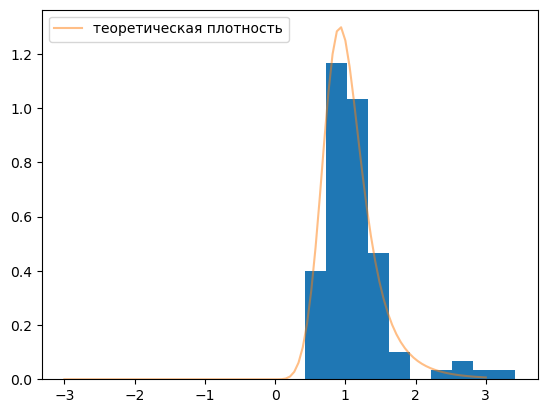

In [57]:
plt.hist(sample, density=True)
x = np.linspace(-3,3,100)
pdf = fisk_1.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [58]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.11985896641795
0.23365272371681825


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

Оригинальное распределение: матожидание: 1.069, дисперсия: 0.1786, ср.кв. отклонение: 0.4226
Выборка: матожидание: 1.1199, дисперсия: 0.2337, ср.кв. отклонение: 0.4834
Количество выборочных средних: 10, матожидание: 1.0737, дисперсия: 0.0187, ср.кв. отклонение: 0.1366
Количество выборочных средних: 100, матожидание: 1.0685, дисперсия: 0.0018, ср.кв. отклонение: 0.0427
Количество выборочных средних: 1000, матожидание: 1.0694, дисперсия: 0.0002, ср.кв. отклонение: 0.0133
Количество выборочных средних: 10000, матожидание: 1.0688, дисперсия: 0.0, ср.кв. отклонение: 0.0042


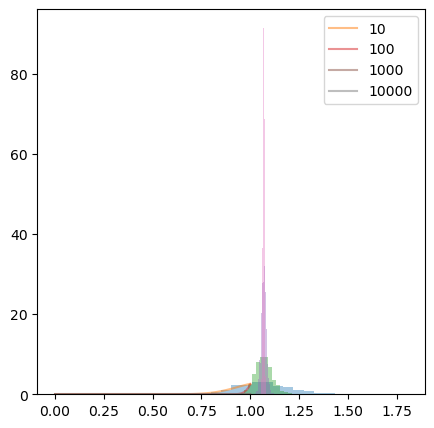

In [73]:
plt.figure(figsize=(5,5))
print(f'Оригинальное распределение: матожидание: {np.round(real_mean, decimals=4)}, дисперсия: {np.round(real_var, decimals=4)}, ср.кв. отклонение: {np.round(fisk_1.std(), decimals=4)}')
print(f'Выборка: матожидание: {np.round(sample_mean, decimals=4)}, дисперсия: {np.round(sample_var, decimals=4)}, ср.кв. отклонение: {np.round(sample.std(), decimals=4)}')
# сгенерируем некоторое количество выборочных средних
for i in [10, 100, 1000, 10000]:
    means = []
    for j in range(1000):
         means.append(np.mean(fisk_1.rvs(i))) #генерация выборки
    plt.hist(means, alpha=0.4, density = True, bins=20) #гистограмма выборочных средних
    norm_rv = sts.norm(loc=fisk_1.mean(), scale=fisk_1.std() / np.sqrt(i))
    x = np.linspace(0, 1, 100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, alpha=0.5)
    print(f'Количество выборочных средних: {i}, матожидание: {np.round(np.mean(means), decimals=4)}, дисперсия: {np.round(np.var(means), decimals=4)}, ср.кв. отклонение: {np.round(np.std(means), decimals=4)}')
plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
#Работает хорошо

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [74]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [75]:
#Для клиент ушел
true_churn_calls = df.query('churn == True')['total day calls']
#true_churn_calls
x_churn1= sts.norm.interval(
    confidence=0.95, loc=np.mean(true_churn_calls), 
    scale=np.std(true_churn_calls, ddof=1)/np.sqrt(true_churn_calls.shape[0])
)

x_churn2=ssw._zconfint_generic(np.mean(true_churn_calls),
                        np.std(true_churn_calls, ddof=1), alpha=0.95, alternative='two-sided')
print(f"Доверительный интервал при интервальной оценке для количества звонков ушедших клиентов: {x_churn1} ")
print(f"Доверительный интервал для количества звонков ушедших клиентов методом _zconfint_generic: {x_churn2} ")


Доверительный интервал при интервальной оценке для количества звонков ушедших клиентов: (99.41066229112079, 103.26014516229537) 
Доверительный интервал для количества звонков ушедших клиентов методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


In [76]:
#Для клиент не ушел
true_churn_calls = df.query('churn == False')['total day calls']
#true_churn_calls
x_churn1= sts.norm.interval(
    confidence=0.95, loc=np.mean(true_churn_calls), 
    scale=np.std(true_churn_calls, ddof=1)/np.sqrt(true_churn_calls.shape[0])
)

x_churn2=ssw._zconfint_generic(np.mean(true_churn_calls),
                        np.std(true_churn_calls, ddof=1), alpha=0.95, alternative='two-sided')
print(f"Доверительный интервал при интервальной оценке для количества звонков не ушедших клиентов: {x_churn1} ")
print(f"Доверительный интервал для количества звонков не ушедших клиентов методом _zconfint_generic: {x_churn2} ")


Доверительный интервал при интервальной оценке для количества звонков не ушедших клиентов: (99.55618833318324, 101.01012745629045) 
Доверительный интервал для количества звонков не ушедших клиентов методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 
